#### Université Paul Sabatier, M2 SID
# Machine learning - Practical, outlier detection

We will work with KDD detection outlier dataset. The dataset can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/). Data was processed as follows:
- We only consider the "other" service category.
- We keep three continuous descriptors: 
    - _duration_: duration of the connection, 
    - _src bytes_: number of data bytes from source to destination ,
    - _dst bytes_: 	number of data bytes from destination to source.
- We used log transform for all three descriptors: $t \mapsto \log(t + 0.1)/10$
- The fourth variable is binary describing if the corresponding entry is a network attack or not.

Datatransformation corresponds to the description in [this article](https://togaware.com/papers/kdd00.pdf)

The following code allows to load the data (4 variables, 5858 observations).

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import math
import numpy as np
import scipy.misc
import scipy as sp
import numpy.random as npr
import sklearn as sk
from sklearn import neighbors
from sklearn import model_selection
from sklearn import decomposition

## Whole data (4 variables, )    
KDD = np.loadtxt('http://www.math.univ-toulouse.fr/~epauwels/LearningM2SID/KDDNetworkIntrusion.txt', delimiter=',')

## Input
X = KDD[:,(0,1,2)]
## Binary output (error or not)
y = KDD[:,3]



## Question 0: descriptive analysis.

Give basic descriptive statistics of the data, correlations, graphical representation etc ...


Number of outliers (over 5858 examples):
98.0


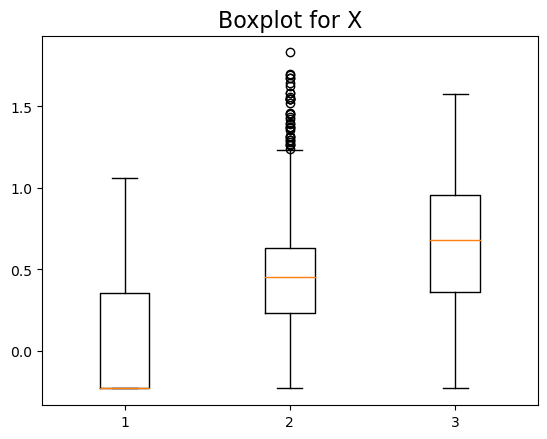

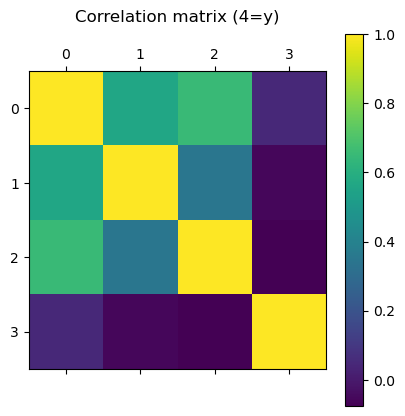

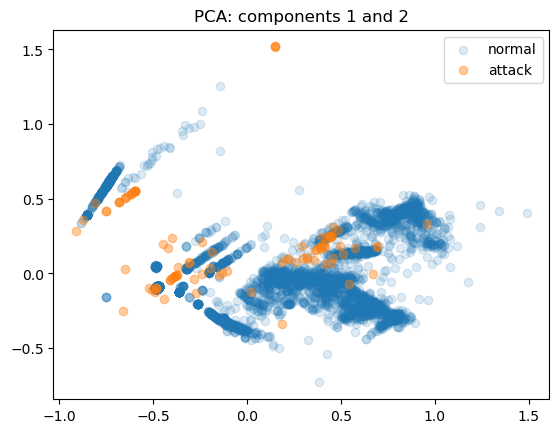

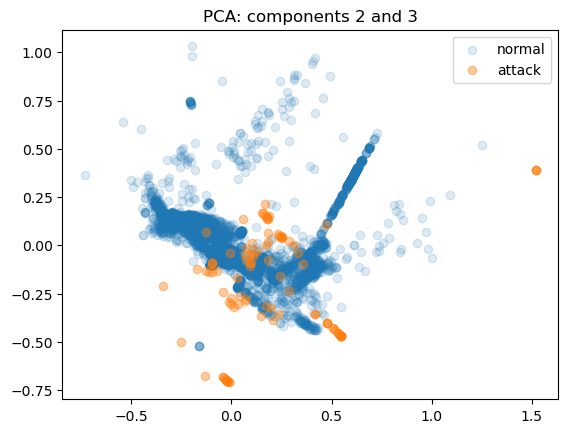

## Question 1: Unsupervised outlier detection using LOF.

For $k = 1, 6, 11, 16,  21, \ldots, 81$ perform outlier detection on the input X using [LOF](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor). Compute area under the [precision recall curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) (AUPR) for each value of $k$. Use scikitlearn internal function to compute the [area under the curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc) 

Text(0.5, 1.0, 'AUPR as a function of k')

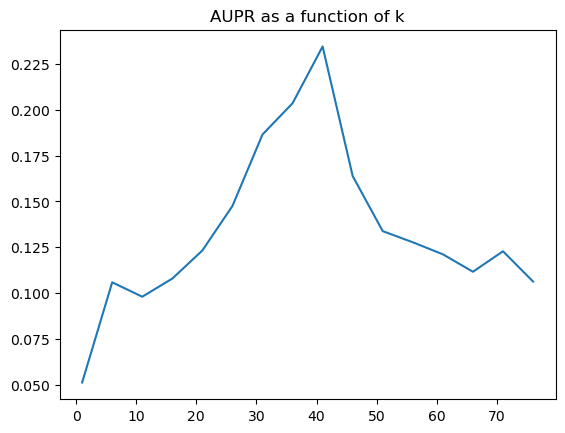

In [7]:
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import LocalOutlierFactor


Ks = np.arange(1,81,5)
AUPR = np.zeros(len(Ks))

for i in np.arange(len(Ks)):
    ## Insert your code here

plt.plot(Ks,AUPR)
plt.title('AUPR as a function of k')


Pic the best value of $k$ and plot the corresponding PR curve. Compare with neighboring values of $k$.

Text(0.5, 1.0, 'Precision recall curve')

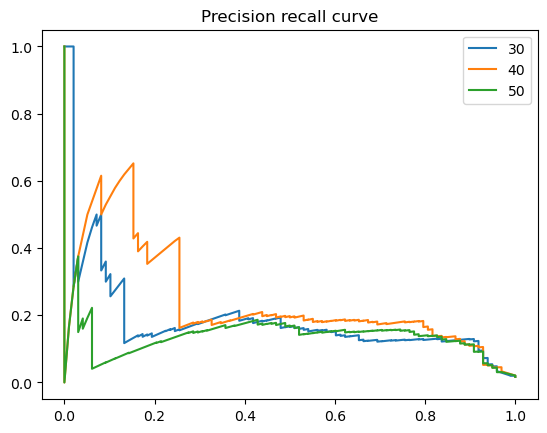

In [8]:
for k in (30,40,50):
    ## Insert your code here

plt.legend()
plt.title('Precision recall curve')


## Question 2: semi-supervised novelty detection.
We split the data set in two: $X_{train}$ which contains only normal traffic and $X_{test}$ which contains both normal traffic and attacks. Perform the same experiment as before but this time fitting the LOF model only on normal traffic and computing the performances on $X_{test}$. Use $\texttt{novelty = True}$, to use the LOF model for computing scores on data different from training samle. What do you observe regarding the best value of $k$?

/tmp/ipykernel_560231/3632403810.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  trainIndex = npr.choice(indexNormal, size=np.int(len(indexNormal)/2), replace=False)


Text(0.5, 1.0, 'AUPR as a function of k')

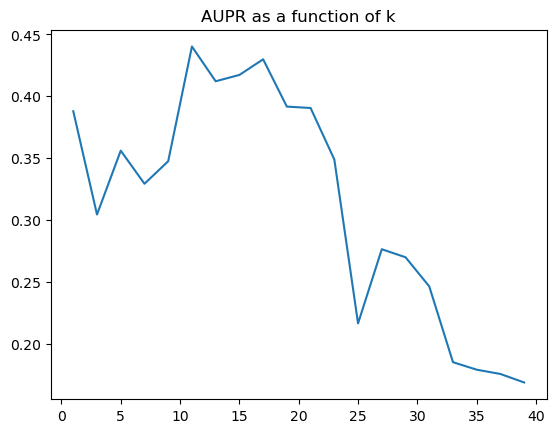

In [9]:
indexNormal = np.where(y == 0)[0]
npr.seed(654321)
trainIndex = npr.choice(indexNormal, size=np.int(len(indexNormal)/2), replace=False)
testIndex = np.setdiff1d(range(len(y)), trainIndex)
Xtrain = X[trainIndex,:]
ytrain = y[trainIndex]
Xtest = X[testIndex,:]
ytest = y[testIndex]


Ks = np.arange(1,41,2)
AUPR = np.zeros(len(Ks))

for i in np.arange(len(Ks)):
    ## Insert your code here

plt.plot(Ks,AUPR)
plt.title('AUPR as a function of k')

Pic the best value of $k$ and plot the corresponding AUPR curve. Compare with neighboring values of $k$.

Text(0.5, 1.0, 'Precision recall curve')

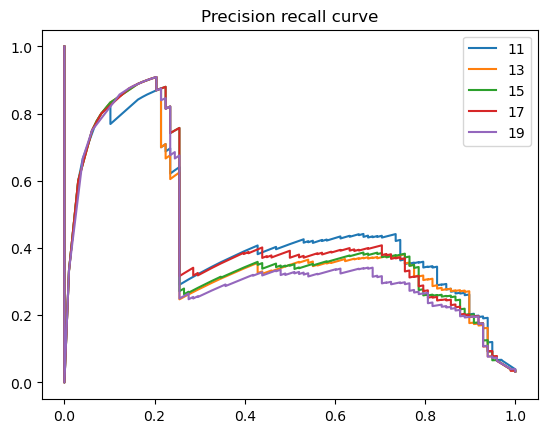

In [10]:
for k in (11,13, 15, 17,19):
    ## Insert your code here

plt.legend()
plt.title('Precision recall curve')

Make a comment regarding semi-supervised novelty detection versus unsupervised outlier detection.

## Question 3: Kernel density estimator
Same questions using [kernel density estimation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity) with Gaussian kernel and various bandwidth (see solution plot for details).

Text(0.5, 1.0, 'AUPR as a function of bandwidth')

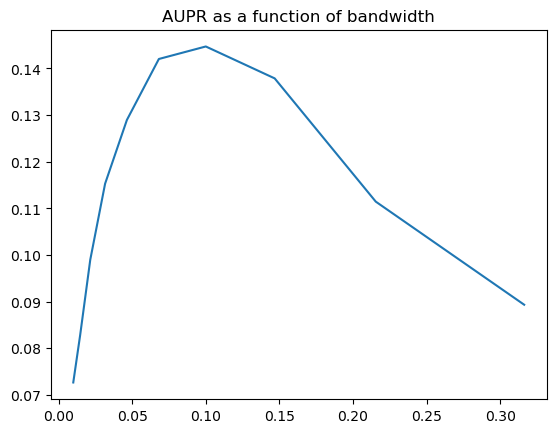

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KernelDensity




Text(0.5, 1.0, 'Precision recall curve (different bandwidth)')

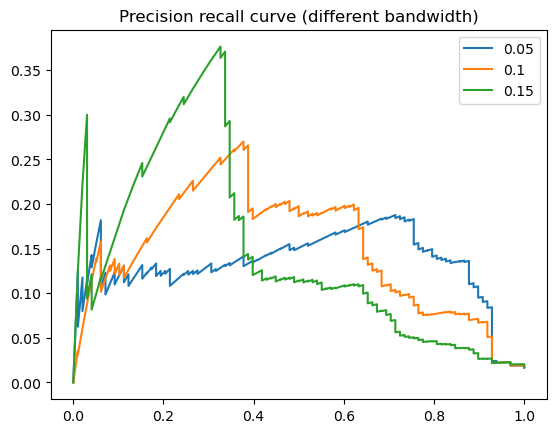

Semi-supervised novelty detection

Text(0.5, 1.0, 'AUPR as a function of bandwidth')

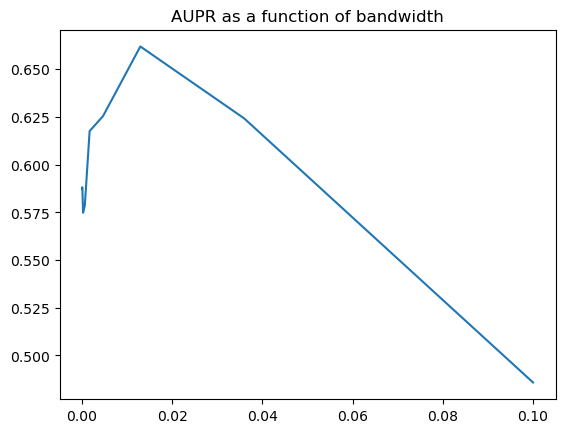

Text(0.5, 1.0, 'Precision recall curve (different bandwidth)')

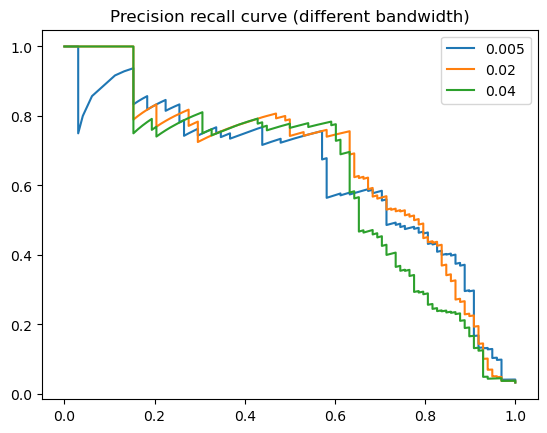